In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

In [2]:
pkl_path = '/users/paulchung/Dropbox (Personal)/Paul Working Folder/home/coding/metis/github_backup/Project-2-Regression/Pickles/'

In [3]:
master_raw_df = pd.read_pickle(pkl_path + 'master_raw_df.pkl')

In [4]:
master_raw_df.head()

,name,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,...,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,AV
0,Peyton Manning,1998,22,IND,QB,18,16,16,3-13-0,326,...,71.2,,22,109,6.08,4.84,3.7,1,1,11
1,Peyton Manning,1999,23,IND,QB,18,16,16,13-3-0,331,...,90.7,,14,116,7.35,7.06,2.6,6,7,18
2,Peyton Manning,2000,24,IND,QB,18,16,16,10-6-0,357,...,94.7,,20,131,7.25,7.22,3.4,2,3,18
3,Peyton Manning,2001,25,IND,QB,18,16,16,6-10-0,343,...,84.1,,29,232,6.77,5.88,5.0,,,15
4,Peyton Manning,2002,26,IND,QB,18,16,16,10-6-0,392,...,88.8,,23,145,6.60,6.09,3.7,4,5,14


In [5]:
master_raw_df.columns

Index(['name', 'Year', 'Age', 'Tm', 'Pos', 'No.', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A',
       'Sk%', '4QC', 'GWD', 'AV'],
      dtype='object')

In [6]:
master_raw_df.columns = ['name', 'Year', 'Age', 'Tm', 'Pos', 'No.', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Pass_Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Sk_Yds', 'NY/A', 'ANY/A',
       'Sk%', '4QC', 'GWD', 'AV']

In [7]:
master_raw_df.head()

,name,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,...,Rate,QBR,Sk,Sk_Yds,NY/A,ANY/A,Sk%,4QC,GWD,AV
0,Peyton Manning,1998,22,IND,QB,18,16,16,3-13-0,326,...,71.2,,22,109,6.08,4.84,3.7,1,1,11
1,Peyton Manning,1999,23,IND,QB,18,16,16,13-3-0,331,...,90.7,,14,116,7.35,7.06,2.6,6,7,18
2,Peyton Manning,2000,24,IND,QB,18,16,16,10-6-0,357,...,94.7,,20,131,7.25,7.22,3.4,2,3,18
3,Peyton Manning,2001,25,IND,QB,18,16,16,6-10-0,343,...,84.1,,29,232,6.77,5.88,5.0,,,15
4,Peyton Manning,2002,26,IND,QB,18,16,16,10-6-0,392,...,88.8,,23,145,6.60,6.09,3.7,4,5,14


In [8]:
master_raw_df[['Win','Loss','Draw']] = master_raw_df['QBrec'].str.split('-',expand=True)

In [9]:
sel_stats = ['name', 'Year', 'Age', 'Tm', 'G', 'GS', 'Win','Loss', 'Cmp', 'Rate','Att', 'Pass_Yds', 'TD', 'Int', 'Sk']
sel_stat_df = master_raw_df[sel_stats]
sel_stat_df.head()

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
0,Peyton Manning,1998,22,IND,16,16,3,13,326,71.2,575,3739,26,28,22
1,Peyton Manning,1999,23,IND,16,16,13,3,331,90.7,533,4135,26,15,14
2,Peyton Manning,2000,24,IND,16,16,10,6,357,94.7,571,4413,33,15,20
3,Peyton Manning,2001,25,IND,16,16,6,10,343,84.1,547,4131,26,23,29
4,Peyton Manning,2002,26,IND,16,16,10,6,392,88.8,591,4200,27,19,23


In [10]:
sel_stat_df.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
count,832,832.000000,832,832,832,832,832,677,832,832,832,832,832,832,832
unique,103,NaN,22,35,18,18,18,15,349,436,444,695,48,31,58
top,Josh McCown,NaN,24,PHI,16,16,,5,0,,0,0,0,0,0
freq,34,NaN,83,37,251,236,155,87,46,40,40,47,138,132,103
mean,NaN,2011.725962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.251957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2008.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Issues
- how do some guys have 18 games/started?


In [11]:
int_cols = ['Age', 'G', 'GS', 'Cmp', 'Att', 'Win', 'Loss', 'Pass_Yds', 'TD', 'Int', 'Sk']

In [12]:
sel_stat_df = sel_stat_df.apply(lambda x: x.str.strip() if x.name in int_cols else x)

In [13]:
sel_stat_df.head()

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
0,Peyton Manning,1998,22,IND,16,16,3,13,326,71.2,575,3739,26,28,22
1,Peyton Manning,1999,23,IND,16,16,13,3,331,90.7,533,4135,26,15,14
2,Peyton Manning,2000,24,IND,16,16,10,6,357,94.7,571,4413,33,15,20
3,Peyton Manning,2001,25,IND,16,16,6,10,343,84.1,547,4131,26,23,29
4,Peyton Manning,2002,26,IND,16,16,10,6,392,88.8,591,4200,27,19,23


In [14]:
# added years experience to be able to drop years in which QBs got injured/rookie where stats aren't meaningful without losing xp

In [15]:
sel_stat_df.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
count,832,832.000000,832,832,832,832,832,677,832,832,832,832,832,832,832
unique,103,NaN,22,35,18,18,18,15,349,436,444,695,48,31,58
top,Josh McCown,NaN,24,PHI,16,16,,5,0,,0,0,0,0,0
freq,34,NaN,83,37,251,236,155,87,46,40,40,47,138,132,103
mean,NaN,2011.725962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.251957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2008.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sel_stat_df = sel_stat_df[sel_stat_df['GS'] != '']

In [17]:
sel_stat_df = sel_stat_df[sel_stat_df['Pass_Yds'] != '0']

In [18]:
sel_stat_df['Win']=sel_stat_df['Win'].replace('', 0)

In [19]:
sel_stat_df['Loss'] = sel_stat_df['Loss'].fillna(0)

In [20]:
sel_stat_df.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
count,785,785.000000,785,785,785,785,785.0,785.0,785,785,785,785,785,785,785
unique,103,NaN,22,35,16,17,18.0,16.0,348,435,443,694,48,31,58
top,Josh McCown,NaN,25,GNB,16,16,0.0,0.0,1,86.4,6,33,0,0,0
freq,28,NaN,77,36,250,236,108.0,108.0,16,8,9,4,91,87,59
mean,NaN,2011.731210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.263017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
sel_stat_df = sel_stat_df.apply(lambda x: x.astype(int) if x.name in int_cols else x)

In [22]:
sel_stat_df = sel_stat_df[sel_stat_df['Att'] > 20]
sel_stat_df

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
0,Peyton Manning,1998,22,IND,16,16,3,13,326,71.2,575,3739,26,28,22
1,Peyton Manning,1999,23,IND,16,16,13,3,331,90.7,533,4135,26,15,14
2,Peyton Manning,2000,24,IND,16,16,10,6,357,94.7,571,4413,33,15,20
3,Peyton Manning,2001,25,IND,16,16,6,10,343,84.1,547,4131,26,23,29
4,Peyton Manning,2002,26,IND,16,16,10,6,392,88.8,591,4200,27,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Nick Mullens,2018,23,SFO,8,8,3,5,176,90.8,274,2277,13,10,17
0,Jeff Driskel,2018,25,CIN,9,5,1,4,105,82.2,176,1003,6,2,16
1,Jeff Driskel,2019,26,DET,3,3,0,3,62,75.3,105,685,4,4,11
0,Lamar Jackson,2018,21,BAL,16,7,6,1,99,84.5,170,1201,6,3,16


In [23]:
sel_stat_df.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
count,699,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000,699.000000
unique,103,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,395,NaN,NaN,NaN,NaN,NaN
top,Josh McCown,NaN,NaN,PHI,NaN,NaN,NaN,NaN,NaN,86.4,NaN,NaN,NaN,NaN,NaN
freq,22,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.666667,28.256080,NaN,11.427754,10.560801,5.549356,4.984263,221.055794,NaN,357.623748,2554.054363,15.925608,9.464950,23.251788
std,NaN,5.308173,4.449198,NaN,4.860681,5.632764,4.193570,3.036272,125.699492,NaN,193.873796,1470.743894,11.098422,5.839777,13.120867
min,NaN,1992.000000,21.000000,NaN,1.000000,0.000000,0.000000,0.000000,8.000000,NaN,21.000000,83.000000,0.000000,0.000000,0.000000
25%,NaN,2008.000000,25.000000,NaN,7.000000,5.000000,2.000000,3.000000,100.500000,NaN,177.000000,1151.000000,6.000000,5.000000,14.000000
50%,NaN,2012.000000,27.000000,NaN,13.000000,13.000000,5.000000,5.000000,244.000000,NaN,401.000000,2865.000000,16.000000,9.000000,24.000000
75%,NaN,2016.000000,31.000000,NaN,16.000000,16.000000,9.000000,7.000000,329.000000,NaN,527.000000,3824.500000,24.000000,13.000000,33.000000


In [130]:
sel_stat_df = sel_stat_df[sel_stat_df['GS'] > 12]
sel_stat_df[sel_stat_df['name'] == 'Alex Smith']

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
1,Alex Smith,2006,22,SFO,16,16,7,9,257,74.8,442,2890,16,16,35
5,Alex Smith,2011,27,SFO,16,16,13,3,273,90.7,445,3144,17,5,44
7,Alex Smith,2013,29,KAN,15,15,11,4,308,89.1,508,3313,23,7,39
8,Alex Smith,2014,30,KAN,15,15,8,7,303,93.4,464,3265,18,6,45
9,Alex Smith,2015,31,KAN,16,16,11,5,307,95.4,470,3486,20,7,45
10,Alex Smith,2016,32,KAN,15,15,11,4,328,91.2,489,3502,15,8,28
11,Alex Smith,2017,33,KAN,15,15,9,6,341,104.7,505,4042,26,5,35


In [25]:
sel_stat_df['Rate'] = sel_stat_df['Rate'].astype(float)

<ipython-input-25-95f8480007ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_stat_df['Rate'] = sel_stat_df['Rate'].astype(float)


In [26]:
sel_stat_df.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
count,361,361.000000,361.000000,361,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
unique,73,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brett Favre,NaN,NaN,GNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.168975,28.465374,NaN,15.462604,15.365651,8.750693,6.578947,325.722992,89.245706,520.373961,3771.326870,24.382271,13.132964,31.734072
std,NaN,5.652603,4.486343,NaN,0.894031,1.016167,2.872070,2.613002,55.570183,11.347285,73.538020,663.081153,7.730396,4.677849,9.759108
min,NaN,1992.000000,21.000000,NaN,13.000000,13.000000,0.000000,0.000000,181.000000,55.700000,295.000000,1869.000000,9.000000,2.000000,8.000000
25%,NaN,2008.000000,25.000000,NaN,15.000000,15.000000,7.000000,5.000000,284.000000,81.300000,471.000000,3296.000000,19.000000,10.000000,25.000000
50%,NaN,2012.000000,28.000000,NaN,16.000000,16.000000,9.000000,6.000000,327.000000,89.000000,522.000000,3812.000000,24.000000,13.000000,31.000000
75%,NaN,2016.000000,31.000000,NaN,16.000000,16.000000,11.000000,8.000000,363.000000,96.700000,571.000000,4233.000000,29.000000,16.000000,38.000000


In [28]:
graph_stat_df = sel_stat_df[['Age', 'GS', 'Cmp', 'Rate', 'Att',
       'Pass_Yds', 'TD', 'Int', 'Sk']]

In [29]:
graph_stat_df.corr()

,Age,GS,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
Age,1.000000,0.114289,0.421319,0.281130,0.333949,0.378535,0.281275,-0.049680,-0.128559
GS,0.114289,1.000000,0.570109,0.276283,0.586009,0.574271,0.452111,0.080905,0.021877
Cmp,0.421319,0.570109,1.000000,0.460432,0.929438,0.907777,0.630418,0.087371,-0.072552
Rate,0.281130,0.276283,0.460432,1.000000,0.188705,0.593524,0.772131,-0.575353,-0.080417
Att,0.333949,0.586009,0.929438,0.188705,1.000000,0.843192,0.514866,0.258859,-0.053062
Pass_Yds,0.378535,0.574271,0.907777,0.593524,0.843192,1.000000,0.755162,0.049880,-0.093125
TD,0.281275,0.452111,0.630418,0.772131,0.514866,0.755162,1.000000,-0.103037,-0.182970
Int,-0.049680,0.080905,0.087371,-0.575353,0.258859,0.049880,-0.103037,1.000000,-0.105949
Sk,-0.128559,0.021877,-0.072552,-0.080417,-0.053062,-0.093125,-0.182970,-0.105949,1.000000


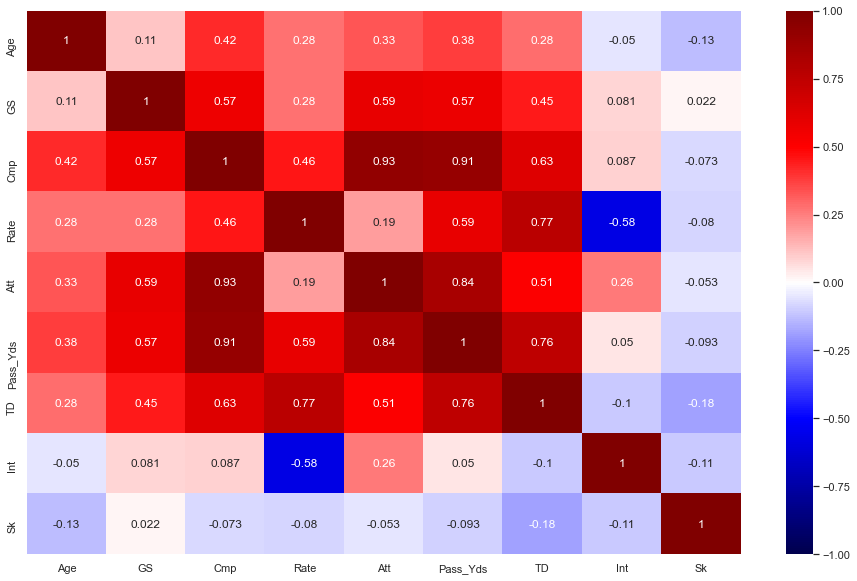

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(graph_stat_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

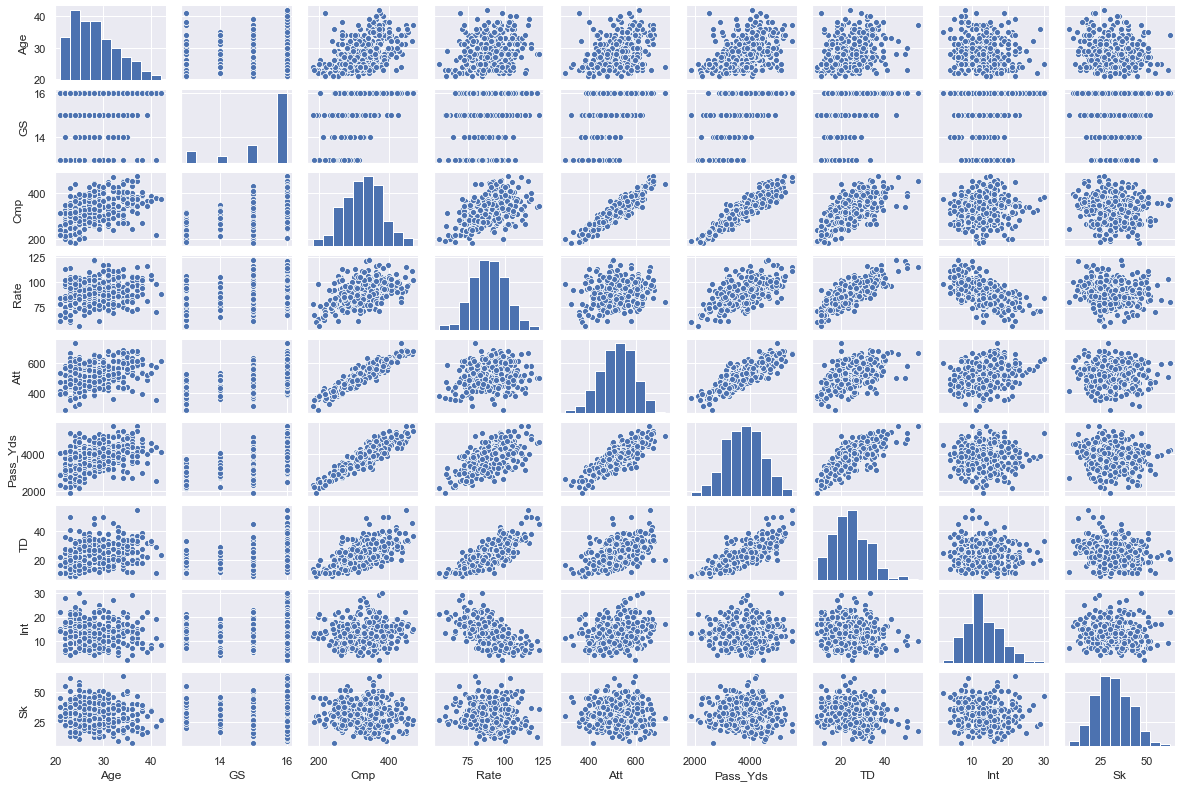

In [31]:
sns.pairplot(graph_stat_df, height=1.2, aspect=1.5)

In [32]:
graph_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 1
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       361 non-null    int64  
 1   GS        361 non-null    int64  
 2   Cmp       361 non-null    int64  
 3   Rate      361 non-null    float64
 4   Att       361 non-null    int64  
 5   Pass_Yds  361 non-null    int64  
 6   TD        361 non-null    int64  
 7   Int       361 non-null    int64  
 8   Sk        361 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 38.2 KB


In [207]:
career_tot_df = sel_stat_df.copy()

In [208]:
career_tot_df.sort_values(['name','Year'], inplace=True)
career_tot_df

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
3,Aaron Rodgers,2008,25,GNB,16,16,6,10,341,93.8,536,4038,28,13,34
4,Aaron Rodgers,2009,26,GNB,16,16,11,5,350,103.2,541,4434,30,7,50
5,Aaron Rodgers,2010,27,GNB,15,15,10,5,312,101.2,475,3922,28,11,31
6,Aaron Rodgers,2011,28,GNB,15,15,14,1,343,122.5,502,4643,45,6,36
7,Aaron Rodgers,2012,29,GNB,16,16,11,5,371,108.0,552,4295,39,8,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Tyrod Taylor,2015,26,BUF,14,14,7,6,242,99.4,380,3035,20,6,36
5,Tyrod Taylor,2016,27,BUF,15,15,7,8,269,89.7,436,3023,17,6,42
6,Tyrod Taylor,2017,28,BUF,15,14,8,6,263,89.2,420,2799,14,4,46
0,Vince Young,2006,23,TEN,15,13,8,5,184,66.7,357,2199,12,13,25


In [209]:
cum_stats = ['name','Year','G','GS','Win','TD','Cmp','Att','Pass_Yds','Int','Sk']
career_tot_df = career_tot_df[cum_stats]
career_tot_df

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk
3,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,34
4,Aaron Rodgers,2009,16,16,11,30,350,541,4434,7,50
5,Aaron Rodgers,2010,15,15,10,28,312,475,3922,11,31
6,Aaron Rodgers,2011,15,15,14,45,343,502,4643,6,36
7,Aaron Rodgers,2012,16,16,11,39,371,552,4295,8,51
...,...,...,...,...,...,...,...,...,...,...,...
4,Tyrod Taylor,2015,14,14,7,20,242,380,3035,6,36
5,Tyrod Taylor,2016,15,15,7,17,269,436,3023,6,42
6,Tyrod Taylor,2017,15,14,8,14,263,420,2799,4,46
0,Vince Young,2006,15,13,8,12,184,357,2199,13,25


In [210]:
car_avg_df = career_tot_df.groupby(['name','Year']).sum().groupby(level=0).cumsum().reset_index()
car_avg_df

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk
0,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,34
1,Aaron Rodgers,2009,32,32,17,58,691,1077,8472,20,84
2,Aaron Rodgers,2010,47,47,27,86,1003,1552,12394,31,115
3,Aaron Rodgers,2011,62,62,41,131,1346,2054,17037,37,151
4,Aaron Rodgers,2012,78,78,52,170,1717,2606,21332,45,202
...,...,...,...,...,...,...,...,...,...,...,...
354,Tyrod Taylor,2015,14,14,7,20,242,380,3035,6,36
355,Tyrod Taylor,2016,29,29,14,37,511,816,6058,12,78
356,Tyrod Taylor,2017,44,43,22,51,774,1236,8857,16,124
357,Vince Young,2006,15,13,8,12,184,357,2199,13,25


In [211]:
# Add back the TD stats shifted to show subsequent year TD as Y
td_df = sel_stat_df[['name','Year','TD']].copy()
td_df.sort_values(by=['name','Year'], inplace=True)

In [212]:
td_df['TD'] = td_df.groupby('name')['TD'].shift(-1)

In [213]:
td_df.rename({'TD':'FY_TD'}, axis=1, inplace=True)

In [214]:
td_df

,name,Year,FY_TD
3,Aaron Rodgers,2008,30.0
4,Aaron Rodgers,2009,28.0
5,Aaron Rodgers,2010,45.0
6,Aaron Rodgers,2011,39.0
7,Aaron Rodgers,2012,38.0
...,...,...,...
4,Tyrod Taylor,2015,17.0
5,Tyrod Taylor,2016,14.0
6,Tyrod Taylor,2017,NaN
0,Vince Young,2006,9.0


In [215]:
car_avg_df = pd.merge(car_avg_df, td_df, on=['name','Year'])
car_avg_df

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk,FY_TD
0,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,34,30.0
1,Aaron Rodgers,2009,32,32,17,58,691,1077,8472,20,84,28.0
2,Aaron Rodgers,2010,47,47,27,86,1003,1552,12394,31,115,45.0
3,Aaron Rodgers,2011,62,62,41,131,1346,2054,17037,37,151,39.0
4,Aaron Rodgers,2012,78,78,52,170,1717,2606,21332,45,202,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
356,Tyrod Taylor,2015,14,14,7,20,242,380,3035,6,36,17.0
357,Tyrod Taylor,2016,29,29,14,37,511,816,6058,12,78,14.0
358,Tyrod Taylor,2017,44,43,22,51,774,1236,8857,16,124,NaN
359,Vince Young,2006,15,13,8,12,184,357,2199,13,25,9.0


In [216]:
df_2019_pred = car_avg_df[car_avg_df['Year'] > 2018]
#df_2019_pred.to_pickle('2019_data_for_pred.pkl')

In [217]:
car_avg_df = car_avg_df[car_avg_df['Year'] < 2019].copy()

In [218]:
cum_avg_stats = ['Cmp','Att','TD','Pass_Yds','Int','Sk']

In [219]:
for stat in cum_avg_stats:
    car_avg_df[stat+'/gm'] = car_avg_df[stat] / car_avg_df['G']
car_avg_df['Career W %'] = car_avg_df['Win'] / car_avg_df['GS']

In [220]:
car_avg_df.dropna(inplace=True)

In [221]:
def calc_passer_rating(row):
    comp_p = (row['Cmp'] / row['Att'] - .3) * 5
    pyd_p = (row['Pass_Yds'] / row['Att'] - 3) * .25
    td_p = (row['TD'] / row['Att']) * 20
    int_p = 2.375 - (row['Int'] / row['Att']) * 25
    return sum([comp_p, pyd_p, td_p, int_p]) / 6

In [222]:
rookie_year_series = sel_stat_df.groupby('name').agg({'Year':'min'})
rookie_year_series
car_avg_df['Yrs Xp'] = car_avg_df['Year']+1 - car_avg_df['name'].apply(lambda x: rookie_year_series.loc[x,'Year'])

In [223]:
car_avg_df

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk,FY_TD,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Career W %,Yrs Xp
0,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,34,30.0,21.312500,33.500000,1.750000,252.375000,0.812500,2.125000,0.375000,1
1,Aaron Rodgers,2009,32,32,17,58,691,1077,8472,20,84,28.0,21.593750,33.656250,1.812500,264.750000,0.625000,2.625000,0.531250,2
2,Aaron Rodgers,2010,47,47,27,86,1003,1552,12394,31,115,45.0,21.340426,33.021277,1.829787,263.702128,0.659574,2.446809,0.574468,3
3,Aaron Rodgers,2011,62,62,41,131,1346,2054,17037,37,151,39.0,21.709677,33.129032,2.112903,274.790323,0.596774,2.435484,0.661290,4
4,Aaron Rodgers,2012,78,78,52,170,1717,2606,21332,45,202,38.0,22.012821,33.410256,2.179487,273.487179,0.576923,2.589744,0.666667,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Tony Romo,2012,77,77,48,147,1729,2690,21229,71,150,31.0,22.454545,34.935065,1.909091,275.701299,0.922078,1.948052,0.623377,6
353,Tony Romo,2013,92,92,56,178,2071,3225,25057,81,185,34.0,22.510870,35.054348,1.934783,272.358696,0.880435,2.010870,0.608696,7
356,Tyrod Taylor,2015,14,14,7,20,242,380,3035,6,36,17.0,17.285714,27.142857,1.428571,216.785714,0.428571,2.571429,0.500000,1
357,Tyrod Taylor,2016,29,29,14,37,511,816,6058,12,78,14.0,17.620690,28.137931,1.275862,208.896552,0.413793,2.689655,0.482759,2


In [225]:
#car_avg_df.to_pickle('car_avg_stats_df.pkl')

# 2019 is hold out (test) data? But should it be 2018 predicting 2019?

## Dummy Model